In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.stats.api as sms

%matplotlib inline


In [2]:
# Считываем файл с данными, заменяем пробелы в названиях колонок на нижнее подч-е.
path_to_file = 'Data/Grocery Database.xlsx'
xl = pd.ExcelFile(path_to_file)
grocery = xl.parse('Grosto DB')
grocery.columns = grocery.columns.str.replace(" ", "_")
grocery


,Receipt_Number,Date,Year,Month,Time,Mobile_Number,Membership_ID,Loyalty_Card_Points,Age,Gender,...,GST,Gross_Bill_Amount,Payment_Mode,Bank_Name,%_Profit_Margin,%_Operating_Cost,%_Product_Cost,Profit_Margin,Operating_Cost,Product_Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


In [3]:
display(grocery.shape)
display(grocery.dtypes)


(50447, 32)

Receipt_Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile_Number                   int64
Membership_ID                  object
Loyalty_Card_Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand_                         object
Description_                   object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net_Bill_Amount               float64
GST                           float64
Gross_Bill_Amount             float64
Payment_Mode                   object
Bank_Name                      object
%_Profit_Mar

In [4]:
# Конвертируем колонку Time с типа object к datetime64[ns] и добавим новую колонку с часом(округленным, без минут) покупки:
grocery['Time'] = grocery['Time'].astype(str)
grocery['Time'] = grocery['Time'].str.split('.').str[0]  # Remove the microseconds
grocery['Time'] = pd.to_datetime(grocery['Time'], format='%H:%M:%S')

grocery['Hour'] = pd.to_datetime(grocery['Time']).dt.round('H')
grocery['Hour'] = pd.to_datetime(grocery['Hour']).dt.hour


In [5]:
# Смотрим наличие незаполненных данных.
grocery.isnull().sum()


Receipt_Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile_Number          0
Membership_ID          0
Loyalty_Card_Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand_                 0
Description_           0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net_Bill_Amount        0
GST                    0
Gross_Bill_Amount      0
Payment_Mode           0
Bank_Name              0
%_Profit_Margin        0
%_Operating_Cost       0
%_Product_Cost         0
Profit_Margin          0
Operating_Cost         0
Product_Cost           0
Hour                   0
dtype: int64

In [6]:
# Сморим совпадают ли общая сумма по чеку
print('Сумма по полю Amount')
display(grocery['Amount'].sum())

test_df = grocery[['Receipt_Number', 'Country', 'City', 'Net_Bill_Amount']].copy()
test_df = test_df.drop_duplicates(subset = 'Receipt_Number')
print('Сумма по полю Net_Bill_Amount')
display(test_df['Net_Bill_Amount'].sum())


Сумма по полю Amount


563390.177

Сумма по полю Net_Bill_Amount


586611.8012

### Общая сумма по чеку не совпадает, смотрим детальнее, возможно несовпадение только по какой-то стране/городу:

In [7]:
df_1 = np.round(grocery.pivot_table(index=['Country', 'City']
                                   , values=['Amount']
                                   , aggfunc= 'sum'))


df_1['Amount'] = df_1.apply(lambda x: "{:,}".format(x['Amount']), axis=1)

df_2 = np.round(test_df.pivot_table(index=['Country', 'City'], values=['Net_Bill_Amount'], aggfunc= 'sum'))
df_2['Net_Bill_Amount'] = df_2.apply(lambda x: "{:,}".format(x['Net_Bill_Amount']), axis=1)

display(df_1, df_2)


Amount
Country     City                   
Indonesia   Jakarta       103,014.0
Malaysia    Kuala Lumpur  121,219.0
Philippines Manila        133,987.0
Singapore   Bedok         135,665.0
            Woodlands      69,505.0

Net_Bill_Amount
Country     City                        
Indonesia   Jakarta            107,018.0
Malaysia    Kuala Lumpur       124,381.0
Philippines Manila             140,282.0
Singapore   Bedok              142,226.0
            Woodlands           72,705.0

### Видим, что суммы несовпадают по всем городам. Такой ситуации может способствовать уйма причин: 
* Из данных, выделенных для анализа, могли удалить некоторые категории а сумма чеков осталась;
* Мог произойти сбой и в какой-то день в чек добавилась лишняя номенклатура либо наоборот;
* Могли удалить какую-то номенклатуру, поэтому в составляюших чека она пропала, а сумма чека осталась неизменна;
* Это могла быть акция от магазина в виде возможности преобрести какой-то фигурки("Джойки" в Сильпо что-то подобное) и для анализа могли быть загружены данные без этой номенклатуры, но она была включена в сумму чека.

Поэтому опритаться в анализе на поле Net_Bill_Amount не будем, а если будет необходимость, то можно пересчитать и создать аналогичный новый столбец.

In [8]:
# Смотрим правильно ли вычислена сумма со скидкой:
df_test_amount = grocery[['Amount','Price', 'QTY', 'DISC']]
df_test_amount['Count_amount'] = df_test_amount['Price'] * df_test_amount['QTY'] * (1 - df_test_amount['DISC'])
df_test_amount[['Amount','Count_amount']].sum()


/var/folders/wk/fmxhg7nx4l16n4c480_hhp740000gn/T/ipykernel_44603/2814886900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_amount['Count_amount'] = df_test_amount['Price'] * df_test_amount['QTY'] * (1 - df_test_amount['DISC'])


Amount          563390.177
Count_amount    563390.177
dtype: float64

In [9]:
# Посмотрим на данные с датами, вдруг какой-то год будет не целым:
display(grocery.Year.unique())
display(grocery.Date.min())
display(grocery.Date.max())


array([2016, 2017, 2018, 2019])

Timestamp('2016-01-01 00:00:00')

Timestamp('2019-12-31 00:00:00')

Теоретически явных признаков проблем с датами - нет.

In [10]:
# Посмотрим какие есть категории товаров и проданное кол-во товаров по ним:
grocery.groupby(['Category'])['QTY'].sum().sort_values(ascending = False)


Category
Bakery & Breakfast           10526
Frozen                        9907
Beauty                        8089
Fruit & Vegetable             6815
Dairy, Chilled & Eggs         5292
Pet Care                      5272
Choco, Snacks, Sweets         4653
Kitchen & Dining              3950
Rice & Cooking Essentials     3767
Meat & Seafood                3369
Beverages                     3357
Mother & Baby                 3154
Household                     2933
Party Supplies                2824
Wines, Beers & Spirits        2656
Health                        1537
Name: QTY, dtype: int64

# №1
### Как ведут себя продажи по разным странам/городам, есть ли видимая сезонность в них?


''

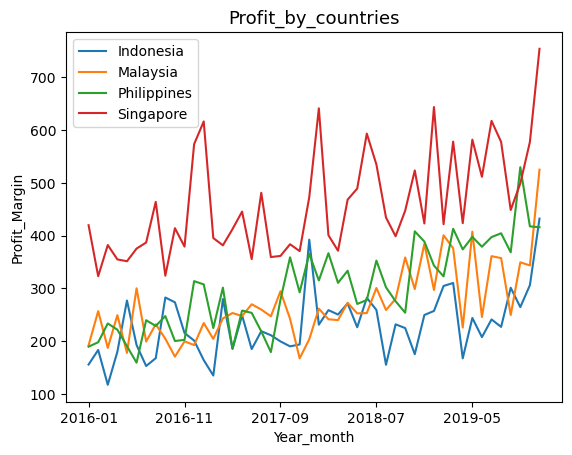

In [11]:
# Создаем новый столбец с месяцем и годом для следующего графика:
grocery['Year_month'] = grocery['Date'].dt.strftime('%Y-%m')

# Сводная таблица для графика:
country_sales = grocery.pivot_table(index=['Year_month']
                                   , columns=['Country']
                                   , values=['Profit_Margin']
                                   , aggfunc= 'sum')
# Создаем list с названиями стран:
country = []
for i in range(len(country_sales.columns)):
    country.append(country_sales.columns[i][1])

# Строим график:
country_sales.plot()
plt.title("Profit_by_countries", fontsize=13)
plt.legend(country, loc='upper left')
plt.ylabel('Profit_Margin') 
;


In [12]:
country_city_s = grocery.pivot_table(index = ['Country', 'City']
                                     , columns = ['Year']
                                     , values = ['Profit_Margin']
                                     , aggfunc = 'sum')
country_city_s = country_city_s.astype(int)
country_city_s.style.background_gradient(axis = 0)


## Лидирующую позицию по общей прибыли занимает Singapore за счет наличия филиалов в 2х городах. С 2016 по 2017 в лидерах был Bedok, которого далее сменил Manila.

## Стоит обратить внимание на Woodlands, т.к. по нему минимальные показатели: связано ли это с мЕньшей покуп-й способностью или причины стоит поискать в организации деятельности.

## Можно узнать за счет каких действий филиал в Manila последние 2 года находится в лидерах, что бы рассматреть такую стратегию развития и для других городов.

## По всем 4м странам видим небольшую тенденцию к росту, однако продажи крайне не стабильные с резкими увеличениями/снижениями (сложно объяснить такие резкие смены продаж "праздниками"), стоит углубиться в изучение динамики продаж, дабы найти узкие места.

## Заметной сезонности по годам не замечаю, стоит каждую категорию отдельно, чтобы можно было точнее говорить про наличие/отсутствие сезонности.

# №2
## Кто больше покупает товаров: М/Ж? Какой их возраст и меняется ли статистика в зависимости от города?


In [13]:
# Создаем таблицу с кол-м купленных позиций(строк в чеке) в зависимости от гендера:
gender_chek = grocery.pivot_table(index = ['City']
                                     , columns = ['Gender']
                                     , aggfunc = 'size')
gender_chek.style.background_gradient(axis = 1)


Gender,Female,Male
City,,
Bedok,11062,1210
Jakarta,7378,1730
Kuala Lumpur,8176,2587
Manila,9537,2843
Woodlands,5669,255


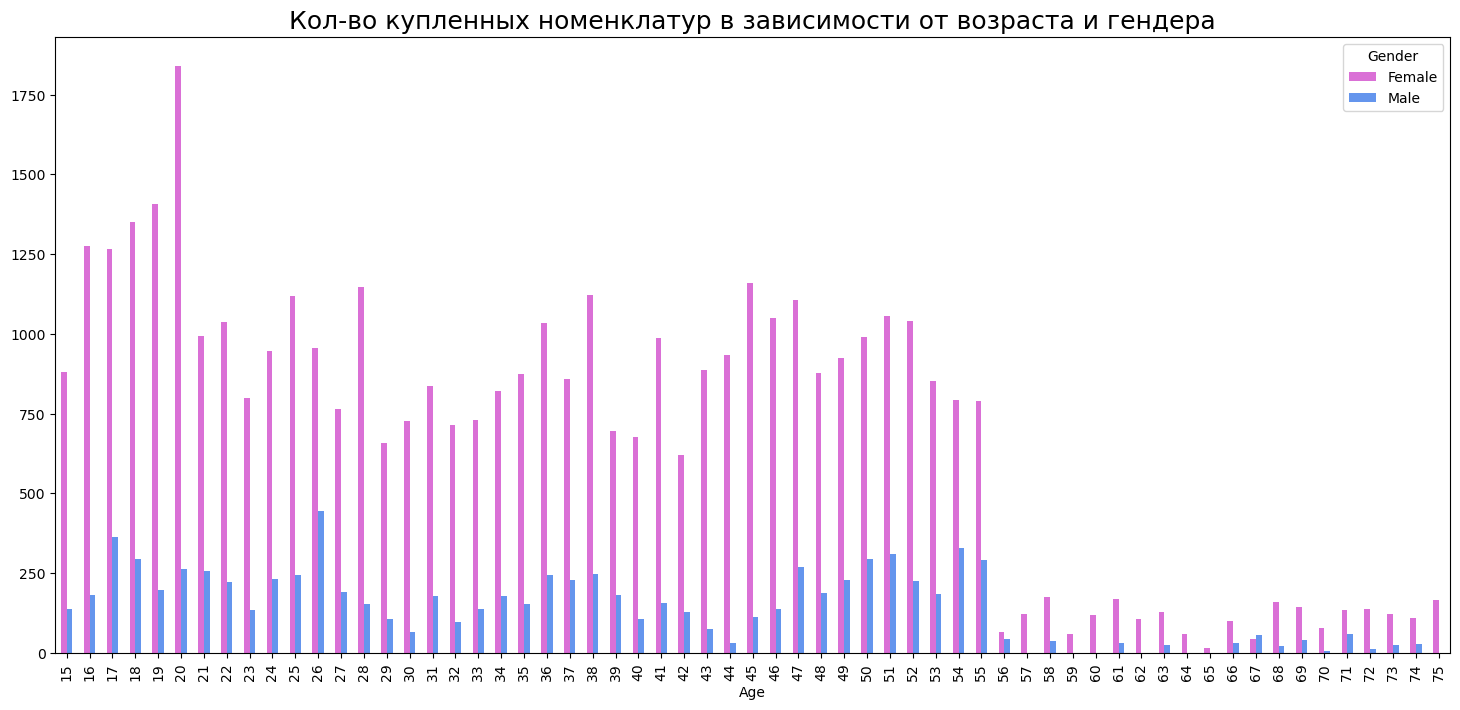

In [14]:
gender_age = grocery.pivot_table(index = ['Age']
                    , columns = ['Gender']
                    , aggfunc = 'size')

gender_age.plot.bar(figsize=(18,8), color = ["orchid", "cornflowerblue"])
plt.title("Кол-во купленных номенклатур в зависимости от возраста и гендера", fontsize=18);


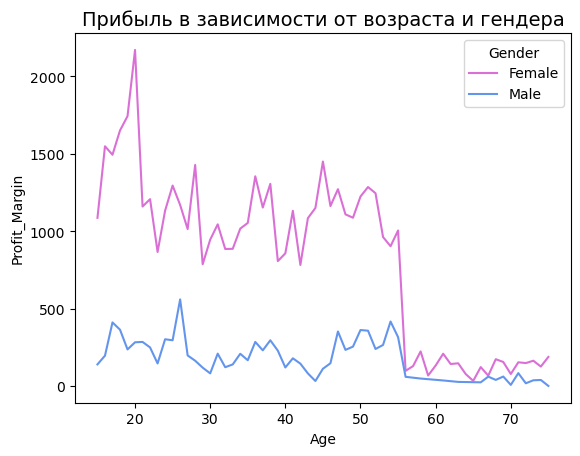

In [15]:
gender_age_marg = grocery.pivot_table(index = ['Age', 'Gender']
                                      , values = ['Profit_Margin']
                                      , aggfunc = 'sum')
gender_age_marg = gender_age_marg.replace(np. nan,0)

sns.lineplot(data = gender_age_marg, x = 'Age', y = 'Profit_Margin', hue = 'Gender', palette = ["orchid", "cornflowerblue"])
plt.title("Прибыль в зависимости от возраста и гендера", fontsize=14);


In [16]:
# Создаем столбец итоговой стоимости товара с учетом налога:
grocery['Amount_GST'] = grocery.Amount * (1 + grocery.GST)

# Посмотрим какое кол-во женщин и мужчин имеют карты магазина:
cards_by_gender = grocery.pivot_table(index = ['City', 'Gender', 'Receipt_Number']
                                       , values = ['Amount_GST']
                                       , aggfunc = 'sum')
cards_by_gender = cards_by_gender.reset_index()

cards_by_gender.groupby(['City', 'Gender']).Receipt_Number.count()

City          Gender
Bedok         Female    2846
              Male       318
Jakarta       Female    1950
              Male       469
Kuala Lumpur  Female    2134
              Male       702
Manila        Female    2391
              Male       703
Woodlands     Female    1467
              Male        68
Name: Receipt_Number, dtype: int64

## Из таблицы видим, что единогласно по всем городам в лидерах по кол-ву купленных номенклатур - женщины. Если смотреть по городам, то в Bedok самый большой показатель среди женщин, в то время как в Manila - самый большой показатель среди мужчин. Поэтому, как и всегда, мы убедились, что рекламу выгоднее делать больше под женскую аудиторию.

## Исходя из графиков по возрастам и по прибыли, видим, что максимальное кол-во покупок совершают клиенты в возрасте от 16 до 20 лет включительно. Можно рассмотреть детальнее есть ли закономерность по времени покупки либо по продуктовой корзине этой возрастной группы и исходя из этого разрабатывать целенаправленную рекламу.

## Очень резко падают показатели для людей старше 55 лет, для этого есть несколько возможных объяснений: 1)либо продолжительность жизни желает быть лучше, 2) либо данные магазины по ценовой категории не подходят этой возрастной группе( и тут зависит от цели магазина: предложить товары на любой бюджет либо не работать с товарами низкой ценовой категории и работать больше на самую платежеспособную часть населения).

# №3
## В какой время дня происходит больше всего покупок в целом и по городам? Одинаково ли ведут себя возрастные группы в зависимости от времени покупок?


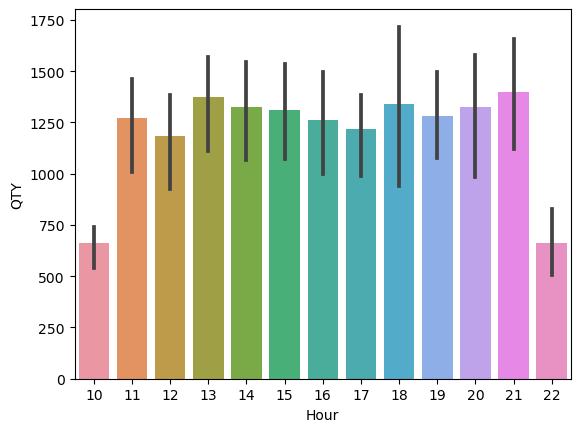

In [17]:
hour_purchases = grocery.pivot_table(index = ['City', 'Hour']
                                     , values = ['QTY']
                                     , aggfunc = 'sum')
hour_purchases = hour_purchases.reset_index()

sns.barplot(data = hour_purchases
            , x = 'Hour'
            , y = 'QTY');


In [18]:
hour_purchases_city = grocery.pivot_table(index = ['Hour']
                                       , columns = ['City']
                                       , values = ['QTY']
                                       , aggfunc = 'sum')
hour_purchases_city = hour_purchases_city.style.background_gradient(axis = 0)
hour_purchases_city


In [19]:
new_col = []
for i in (grocery.Age):
    first_f = i // 10
    
    if (i % 10) >= 5:
        second_f = 0
    else:
        second_f = 5
        
    if (second_f == 0):
        first_n = str(first_f) + '5'
        second_n = (first_f+1) * 10
        interval = first_n + '-' + str(second_n)
    else:
        first_n = first_f * 10
        second_n = str(first_f) + '5'
        interval = str(first_n) + '-' + second_n
    new_col.append(interval)
    
grocery['Age_interval'] = new_col


hour_purchases_age = grocery.pivot_table(index = ['Hour']
                                       , columns = ['Age_interval']
                                       , values = ['QTY']
                                       , aggfunc = 'sum')
hour_purchases_age = hour_purchases_age.replace(np. nan,0)
hour_purchases_age = hour_purchases_age.style.background_gradient(axis = 0)
print('Кол-во покупок определенной возрастной категории по часам')
hour_purchases_age
    

Кол-во покупок определенной возрастной категории по часам


In [20]:
avg_chek = grocery.pivot_table(index = ['City', 'Receipt_Number']
                                       , values = ['Amount_GST']
                                       , aggfunc = 'sum')
avg_chek = avg_chek.reset_index()

display('Средний чек:', avg_chek.groupby('City').Amount_GST.mean())
display('Медиана по чеку:', avg_chek.groupby('City').Amount_GST.median())


'Средний чек:'

City
Bedok           45.879064
Jakarta         46.843721
Kuala Lumpur    45.307657
Manila          48.502262
Woodlands       48.449670
Name: Amount_GST, dtype: float64

'Медиана по чеку:'

City
Bedok           35.187913
Jakarta         33.846120
Kuala Lumpur    33.197769
Manila          37.911104
Woodlands       37.305550
Name: Amount_GST, dtype: float64

## Из общего графика видим, что пиковые часы по покупкам приходятся на 13/14/18/20/21 час. В эти временные промежутки нужно настроить работу так, что бы была максимальная доступность товара, товар был принят и выставлен на полки.

## Однако, если просмотреть пиковые часы по городам, то картина немного меняется, стоит взять во внимание, что:
## 1) В Bedok пиковый час припадает на 18;
## 1) В Jakarta пиковый час припадает на 13;
## 1) В Kuala Lumpur пиковый час припадает на 11/20/21;
## 1) В Manila пиковый час припадает на 18/20/21;
## 1) В Woodlands пиковый час припадает на 19/21.

## Для того, что бы проводить целенаправленные акции/ понимать в какие часы приходят покупатели за определенными товарами/ либо включать необходимую музыку в магазине( которая подымает настроение и увеличивать шанс бОльшей покупки или спонтанной, в зависимости от возраста приходящих клиентов // либо пускать по громкой связи рекламу под необходимую аудиторию, которая с бОльшей вероятностью может находиться сейчас в магазине) рассмотрим пиковые часы покупок клиентов по возрастным категориям:

## Например самая прибыльная категория клиентов от 16 до 20 делает бОльшую часть покупок в 15 часов дня. Люди от 45 до 50 более склонны делать покупки вечером 20/21. Люди 25-30 и 35-40 склонны делать больше покупок днем и поздно вечером.

# №4
## Какие категории в целом по всем странам приносять бОльшую прибыль и какие бренды? Какие топовые товары в каждой категории и какие это бренды?


#### Возможно есть товары, которые не приносят большой прибыли, но продаются в большом кол-ве и занимают много средств на хранение, тогда по таким товарам стоит принимать решения, возможно проводить переговоры с поставщиками для поиска более выгодных условий.


In [21]:
brand_categ = grocery.pivot_table(index = ['City', 'Category', 'Brand_']
                                       , values = ['QTY', 'Profit_Margin']
                                       , aggfunc = 'sum')
brand_categ = round(brand_categ)
brand_categ = brand_categ.reset_index()


In [23]:
# Находим индекс максимальной прибыли по городу:
total_city_top_brand_idx = brand_categ.groupby(['City'])['Profit_Margin'].idxmax()

# Отбираем максимальные значения по полученным индексам и получаем топ бренд по каждому городу:
top_brand_by_city = brand_categ.loc[total_city_top_brand_idx]
top_brand_by_city


,City,Category,Brand_,Profit_Margin,QTY
352,Bedok,"Wines, Beers & Spirits",Ashai,452.0,315
721,Jakarta,"Wines, Beers & Spirits",Ashai,355.0,250
1093,Kuala Lumpur,"Wines, Beers & Spirits",Ashai,357.0,254
1467,Manila,"Wines, Beers & Spirits",Ashai,417.0,293
1833,Woodlands,"Wines, Beers & Spirits",Ashai,184.0,128


In [24]:
# Находим индекс максимальной прибыли по категории товара
total_categ_top_brand_idx = brand_categ.groupby(['Category'])['Profit_Margin'].idxmax()

# Отбираем максимальные значения по полученным индексам и получаем топ бренд по каждой категории товара:
top_brand_by_categ = brand_categ.loc[total_categ_top_brand_idx]
top_brand_by_categ


,City,Category,Brand_,Profit_Margin,QTY
1120,Manila,Bakery & Breakfast,BonJour,226.0,381
46,Bedok,Beauty,Sensodyne,221.0,197
62,Bedok,Beverages,Nescafe,53.0,82
92,Bedok,"Choco, Snacks, Sweets",Sainbury,176.0,334
128,Bedok,"Dairy, Chilled & Eggs",Yakult,208.0,246
1271,Manila,Frozen,Silversea,162.0,63
166,Bedok,Fruit & Vegetable,Cascadiam Farm,353.0,183
203,Bedok,Health,Monster,120.0,63
965,Kuala Lumpur,Household,Glade,58.0,47
248,Bedok,Kitchen & Dining,Swee!,77.0,185


In [25]:
# Таблица с названием бренда, который приносит максимальную прибыль в своей категории и в своей стране:

# Находим индекс максимальной прибыли по городу и категории товара
top_brand_idx = brand_categ.groupby(['City', 'Category'])['Profit_Margin'].idxmax()

# Отбираем максимальные значения по полученным индексам и получаем топ бренд по каждому городу и категории товара:
top_brand_by_city_categ = brand_categ.loc[top_brand_idx]
top_brand_by_city_categ
    

,City,Category,Brand_,Profit_Margin,QTY
5,Bedok,Bakery & Breakfast,BonJour,213.0,373
46,Bedok,Beauty,Sensodyne,221.0,197
62,Bedok,Beverages,Nescafe,53.0,82
92,Bedok,"Choco, Snacks, Sweets",Sainbury,176.0,334
128,Bedok,"Dairy, Chilled & Eggs",Yakult,208.0,246
...,...,...,...,...,...
1781,Woodlands,Mother & Baby,Seventh Generation,54.0,48
1784,Woodlands,Party Supplies,Biogreen,76.0,130
1793,Woodlands,Pet Care,Nature's Gift,141.0,140
1826,Woodlands,Rice & Cooking Essentials,San remo,14.0,26


In [26]:
brand_categ.sort_values(by='QTY', ascending=False)


,City,Category,Brand_,Profit_Margin,QTY
744,Kuala Lumpur,Bakery & Breakfast,BonJour,220.0,383
1120,Manila,Bakery & Breakfast,BonJour,226.0,381
189,Bedok,Fruit & Vegetable,ThyGrace,136.0,380
5,Bedok,Bakery & Breakfast,BonJour,213.0,373
1412,Manila,Party Supplies,Biogreen,201.0,343
...,...,...,...,...,...
364,Bedok,"Wines, Beers & Spirits",Oyster Bray,4.0,1
369,Bedok,"Wines, Beers & Spirits",World's CellarGrigio,2.0,1
1468,Manila,"Wines, Beers & Spirits",Bringer,3.0,1
1811,Woodlands,Rice & Cooking Essentials,Knife,1.0,1


## По всем городам лидером за прибылью является одна категория товаров: Wines, Beers & Spirits и один бренд: "Ashai";

## На второй таблице можем увидеть топовые бренды по каждой категории, в категории Health, например, топовым брендом является "Monster")))

## Третья таблица - расширенный вариант топовых брендов по городам и категориям, возможно локально какие-то города немного меняют лидирующие бренды.

## Всё это полезно, для того, что бы понимать кто твои прибылеприносящие бренды, "держать руку на пальсе", развивать отношения с этими брендами, проводить акции.

# №5
## Есть ли взаимосвязь между покупкой определенной категории товара и дня недели?


In [27]:
grocery['Day_name'] = grocery.Date.dt.day_name()

categ_by_day = grocery.pivot_table(index = ['Category']
                                       , columns = ['Day_name']
                                       , values = ['QTY']
                                       , aggfunc = 'sum')
categ_by_day = categ_by_day.reset_index()
categ_by_day.style.background_gradient(axis = 1)


## Из таблицы видим, что лидером покупок почти по всем категориям является - Среда. А вот в Четверг и Субботу наблюдаются минимвльное кол-во покупок почти по всем категориям. В воскресенье люди просто обожают покупать замороженные продукты(возможно в этот день поставка товара/ акция), во вторник решают позаботиться о здоровье и купить что-то из категории "Health" и запастись молочными продуктами "Dairy, Chilled & Eggs".

## Все эти данные стоит учитывать при планировании поставок/акций.


# №6
## С каким банком чаще всего пользуются клиенты, возможно с каким-то банком стоит усторить коллаборацию? Какой способ оплаты чаще используют клиенты?


In [28]:
round(grocery.groupby(['Payment_Mode']).Amount_GST.sum(), 0).astype(int)

Payment_Mode
Card      211128
Cash      195499
Wallet    204778
Name: Amount_GST, dtype: int64

In [29]:
bank_by_city = grocery.pivot_table(index = ['City', 'Bank_Name']
                                       , columns = ['Payment_Mode']
                                       , values = ['Amount_GST']
                                       , aggfunc = 'sum')
bank_by_city  = round(bank_by_city.replace(np. nan,0), 0).astype(int)
bank_by_city.style.background_gradient(axis = 0)


In [30]:
total_by_banks = grocery.pivot_table(index = ['Bank_Name']
                                       , columns = ['Payment_Mode']
                                       , values = ['Amount_GST']
                                       , aggfunc = 'sum')
total_by_banks = round(total_by_banks.replace(np. nan,0)).astype(int)
total_by_banks.style.background_gradient(axis = 0)


## Больше всего оплат проводятся картой Card, меньше всего наличными Cash, однако разница между тремя видами оплаты невелика.

## Лидирующую позицию занимает банк BDO Unibank, так же в 5ку самых популярных вошли: Philippine National bank, Philippine Veterans Bank, Enterprise Bank, ING Bank.

## На все эти банки стоит обратить внимание для возможного сотрудничества.

# №7
## Есть ли зависимость между ценой товара, кол-м купленного товара и способом оплаты?

<Figure size 500x500 with 0 Axes>

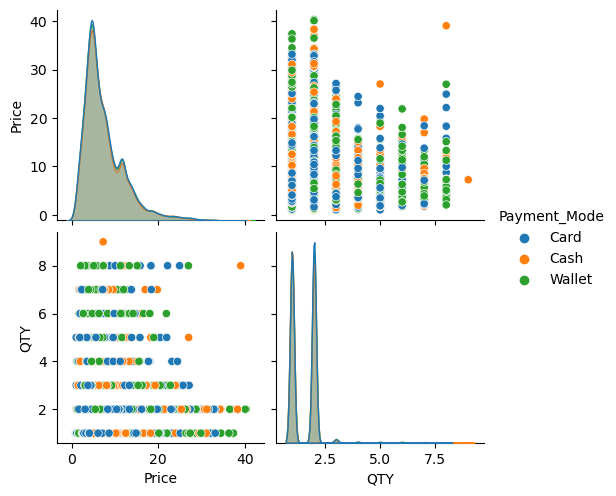

In [31]:
new_tab = grocery[['Price', 'QTY', 'Payment_Mode']]

plt.figure(figsize = (5,5))
sns.pairplot(data = new_tab, hue = 'Payment_Mode');


## Из графика видим, что чем больше количество определенного товара в чеке, тем будет ниже цена самого товара. Чаще всего покупают товары в кол-ве 1 или 2 ед.,

## Так же видим, что если кол-во единиц опред-го товара >5, то клиент чаще расплачивается с помощью Wallet, а если <=5, тогда преобладает оплата Card.

## Возможно эти данные пригодятся для организации акций.


# №8
## Как распределяется сумма покупки по месяцам?

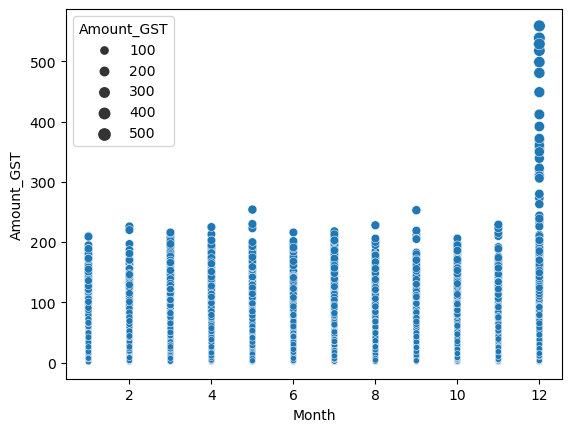

In [32]:
cheks = grocery.pivot_table(index = ['Month', 'Receipt_Number']
                                       , values = ['Amount_GST']
                                       , aggfunc = 'sum')
cheks = round(cheks.replace(np. nan,0)).astype(int)
cheks = cheks.reset_index()

sns.scatterplot(data = cheks , x='Month', y = 'Amount_GST', size = 'Amount_GST');


In [33]:
cheks.groupby('Month').Amount_GST.sum()


Month
1     53078
2     46362
3     50260
4     46192
5     51301
6     48159
7     52512
8     48651
9     48415
10    51753
11    50907
12    63819
Name: Amount_GST, dtype: int64

## Видим, что в 12м месяце сумма чеков значительно возрастает, есть небольшие выбросы в 5м и 9м месяцах.

## По общим суммам чеков продаж за месяц наблюдаются колебания значений через месяц от +-51т. до +-46т. 

## По сравнению с первым графиком в этом файле, на котором можно было видеть колебания прибыли, график сумм по чекам более плавный, не считая "праздничного" 12го месяца.
